In [ ]:
df=pd.read_csv('C:/Users/742711/Documents/ML/Decision-Tree-from-Scratch-master/Decision-Tree-from-Scratch-master/data/Titanic.csv')

In [ ]:
train_df, test_df=train_test_split(df,test_size_proportion=0.2)
tree=decission_tree_alogrithm(train_df)
accuracy=calculate_accuracy(test_df,tree)

<h1>Import the module</h1>

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random
import pprint as pprint

#load and prepare data

# #Import data and make the required changes in the system

In [5]:
df=pd.read_csv(r'C:\Users\742711\Documents\ML\Decision-Tree-from-Scratch-master\Decision-Tree-from-Scratch-master\data\iris.csv')
df.drop('Id',axis=1, inplace =True)
df.rename(columns={'species':'Label'},inplace=True)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


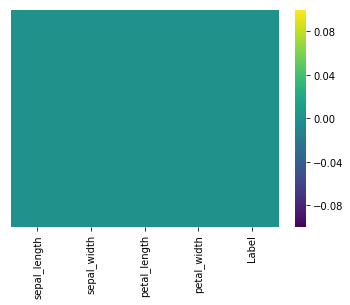

In [6]:
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

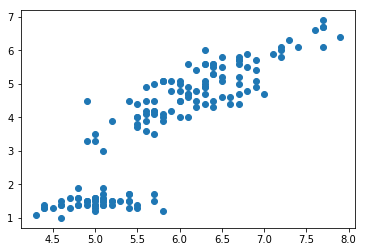

In [7]:
plt.plot( 'sepal_length','petal_length', data=df, linestyle='none', marker='o')
plt.show()

In [8]:
 df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Label           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Label           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<h1>Train_test_split_df</h1>

In [10]:
def train_test_split(df,test_size):
    if isinstance(test_size, float):
        test_size=round(test_size*len(df))

    index=df.index.tolist()
    test_index=random.sample(population=index,k=test_size)
    
    test_df=df.loc[test_index]
    train_df=df.drop(test_index)
    return  train_df, test_df

<h1>random selection by index id</h1>

In [11]:
random.seed(0)
train_df, test_df= train_test_split(df, test_size=0.2)

In [12]:
len(test_df)

30

In [13]:
train_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



# Working with numpy is faster then pandas

In [14]:
data=train_df.values
data[:]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Iris-setosa'],
       [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'],
       [5.2, 3.5, 1.5, 0.2, 'Iri

In [15]:
def purity_check(data):
    label_column=data[:,-1]
    unique_label_values=np.unique(label_column)
    
    if len(unique_label_values)==1:
        return True
    else:
        return False
    

In [16]:
purity_check(train_df[train_df.petal_width< 0.2].values)
purity_check(train_df[train_df.petal_width> 0.2].values)

False

# Classify

In [17]:
def class_data(data):
    label_column=data[:,-1]  
    unique_class, class_count=np.unique(label_column,return_counts=True)
    classification=unique_class
    return classification

In [18]:
class_data(train_df[train_df.petal_width >0.0].values)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


# potential splits

In [19]:
def potential_split(data):
    potential_splits={}
    nrow,n_columns=data.shape
    for columns in range(n_columns-1):
        potential_splits[columns]=[]
        values=data[:,columns]
        unique_values=np.unique(values)
        unique_values.sort()

        for i in range(len(unique_values)):
            if i!=0:
                current_index=unique_values[i]
                next_index=unique_values[i-1]
                potential_split=(current_index+next_index)/2
                potential_splits[columns].append(potential_split)
    
    return potential_splits

In [20]:
potential_splits=potential_split(train_df.values)

C:\Users\742711\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


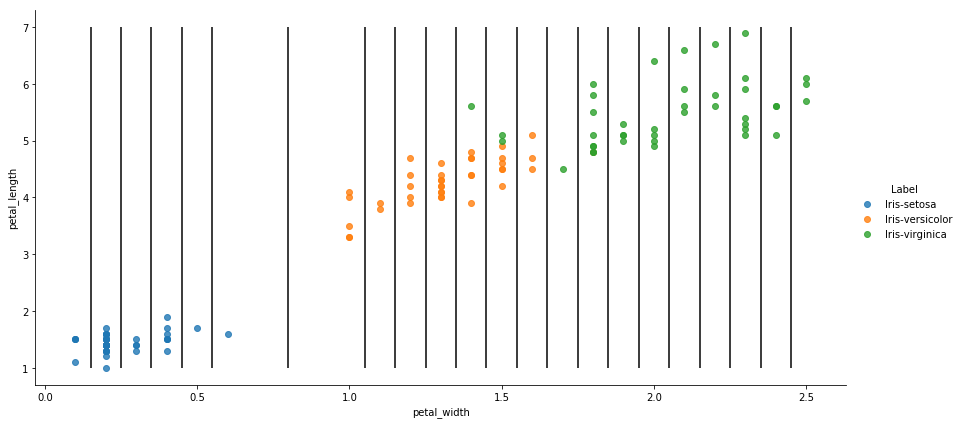

In [21]:
sns.lmplot(data=train_df, x='petal_width', y='petal_length',hue='Label',fit_reg=False,size=6,aspect=2)
plt.vlines(x=potential_splits[3], ymin=1,ymax=7)

C:\Users\742711\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


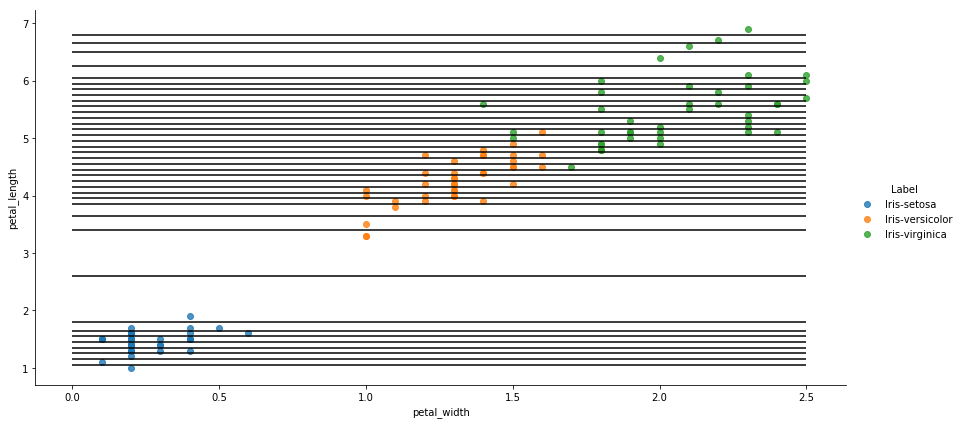

In [22]:
sns.lmplot(data=train_df, x='petal_width', y='petal_length',hue='Label',fit_reg=False,size=6,aspect=2)
plt.hlines(y=potential_splits[2], xmin=0,xmax=2.5)


# split the data set

In [76]:
def split_data(data,split_column,split_values):
    split_column_values=data[:,split_column]
    
    data_below=data[split_column_values <=split_values]
    data_above=data[split_column_values>split_values]
    return data_below, data_above


In [75]:
split_column=3
split_values=0.8 


In [77]:
data_below,data_above=split_data(data,split_column,split_values)

C:\Users\742711\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


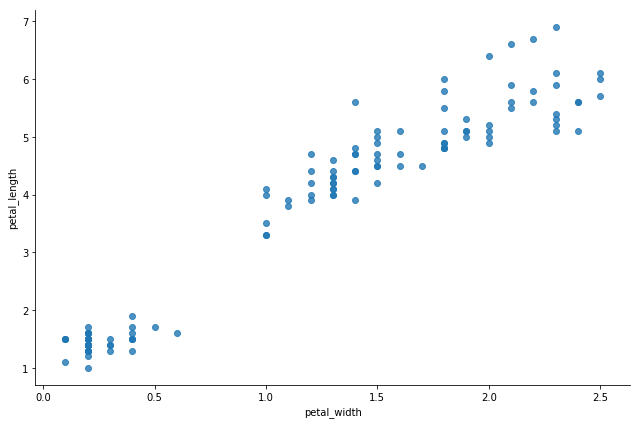

In [78]:
plot_df=pd.DataFrame(data,columns=df.columns)
sns.lmplot(data=plot_df, x='petal_width' ,y='petal_length' ,aspect=1.5, fit_reg=False, size=6)

C:\Users\742711\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


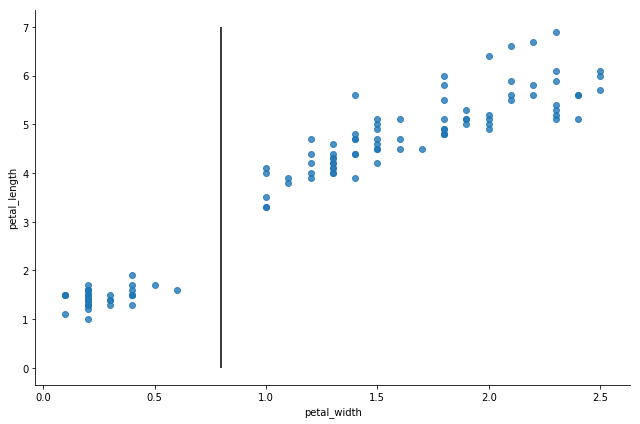

In [79]:
sns.lmplot(data=plot_df, x='petal_width' ,y='petal_length' ,aspect=1.5, fit_reg=False, size=6)
plt.vlines(x=split_values,ymin=0,ymax=7)

# Entropy Function_creation

In [80]:
def calculate_entropy(data):
    label=data[:,-1]
    _,count=np.unique(label,return_counts=True)
    
    probability=count/count.sum()
    entropy=sum(probability* -np.log2(probability))    
    
    return entropy

    

In [81]:
calculate_entrop(data_above)

0.9989595114657399

# Overall Entropy

In [82]:
def overall_Entropy(data_below, data_above):
    n_all_data=len(data_below)+len(data_above)
    p_below=len(data_below)/n_all_data
    p_above=len(data_above)/n_all_data
    overall_Entropy=(p_below * calculate_entropy(data_below)+ p_above*calculate_entropy(data_above))
    
    return overall_Entropy
    

In [83]:
overall_Entropy(data_below, data_above)

0.6576483450482787